# Realce de imagens no domínio do espaço e Filtros Espaciais

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### Negativo de uma imagem

In [4]:
def negativo_imagem(img):
  L = 255
  return ((L - 1) - img)

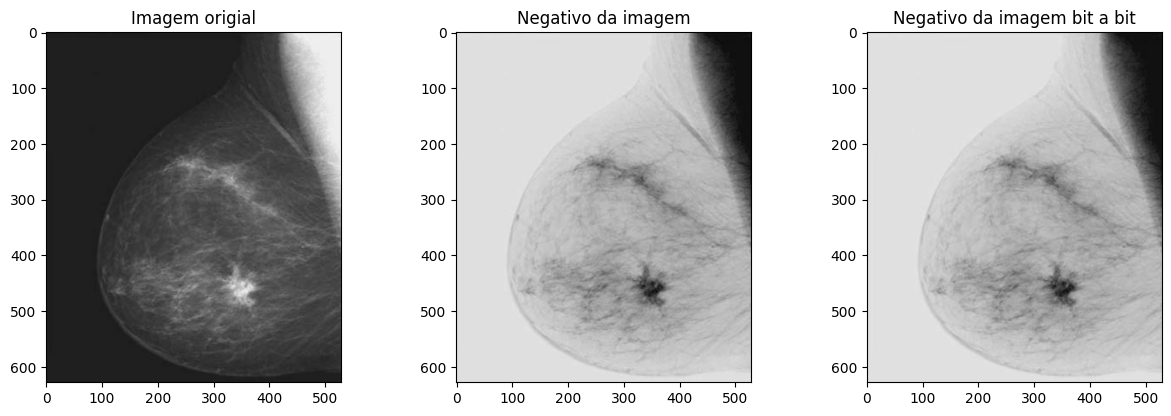

In [6]:
path_img1 = 'mammography.jpg'

img1 = cv2.imread(path_img1)
img1_neg = negativo_imagem(img1)
img1_neg_bit = cv2.bitwise_not(img1)

plt.figure(figsize=(15,10))
plt.subplot(231);
plt.title('Imagem origial');
plt.imshow(img1)
plt.subplot(232);
plt.title('Negativo da imagem');
plt.imshow(img1_neg);
plt.subplot(233);
plt.title('Negativo da imagem bit a bit');
plt.imshow(img1_neg_bit);

###  Transformação de log de uma imagem

Pout = C * log(1 + Pin)

C = constante de escala

Pin = pixel de entrada

Pout = pixel de saída

C = 255 / (log(1 + max_pixel_value)

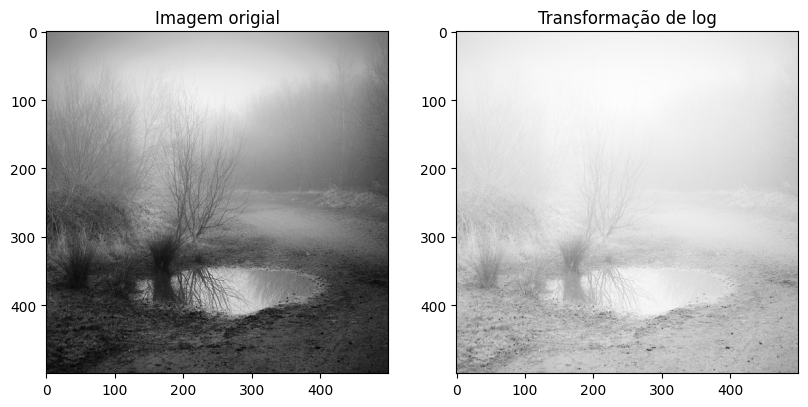

In [10]:
img2 = cv2.imread('grayView.jpg')

c = 255 / np.log(1 + np.max(img2))
img2_log = c * np.log(1 + img2 )

img2_log = np.array(img2_log, dtype = np.uint8)

plt.figure(figsize=(15,10))
plt.subplot(231);
plt.title('Imagem origial');
plt.imshow(img2)
plt.subplot(232);
plt.title('Transformação de log');
plt.imshow(img2_log)

### Trasformação gamma

In [17]:
def gamma_transformation(x, gamma):
  value_gamma = np.empty((256,), np.uint8)

  for i in range(256):
    value_gamma[i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

  result = cv2.LUT(x, value_gamma)

  return result

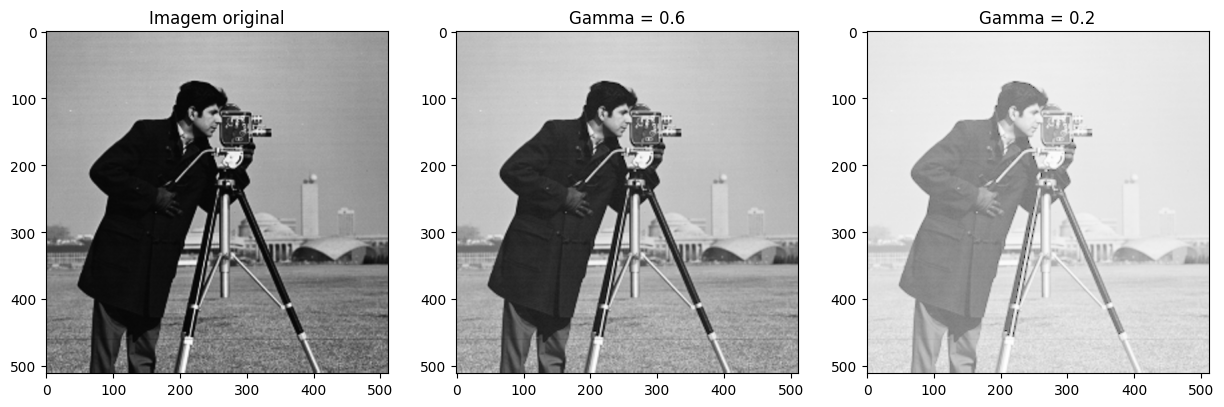

In [18]:
img3 = cv2.imread('cameraman_original.png')
gamma_value = 0.6
img3_gamma = gamma_transformation(img3, gamma_value)
gamma_value = 0.2
img4_gamma = gamma_transformation(img3, gamma_value)

plt.figure(figsize=(15,10))
plt.subplot(231);
plt.title('Imagem original');
plt.imshow(img3, cmap='gray');
plt.subplot(232);
plt.title('Gamma = 0.6');
plt.imshow(img3_gamma, cmap='gray');
plt.subplot(233);
plt.title('Gamma = 0.2');
plt.imshow(img4_gamma, cmap='gray');

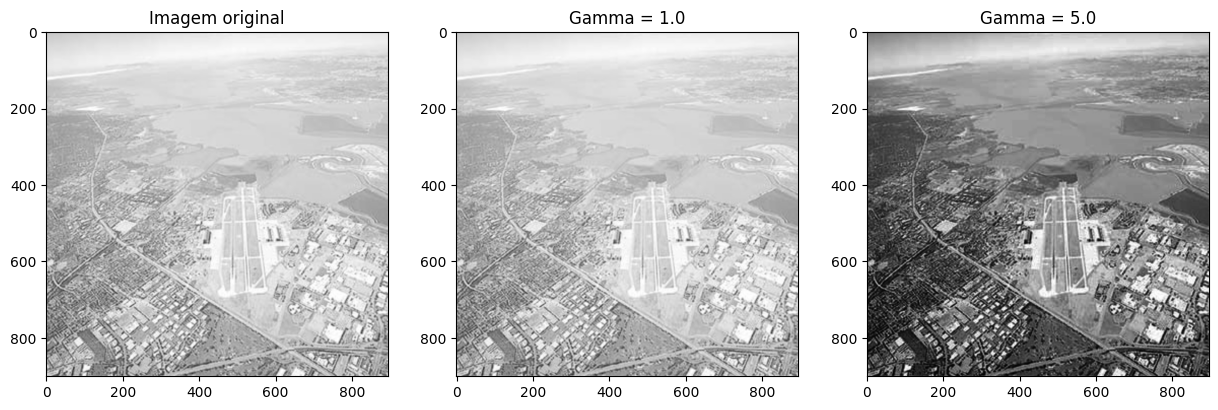

In [20]:
img5 = cv2.imread('city.jpg')

gamma_value = 1.0
img5_gamma = gamma_transformation(img5, gamma_value)
gamma_value = 3.0
img6_gamma = gamma_transformation(img5, gamma_value)

plt.figure(figsize=(15,10))
plt.subplot(231);
plt.title('Imagem original');
plt.imshow(img5, cmap='gray');
plt.subplot(232);
plt.title('Gamma = 1.0');
plt.imshow(img5_gamma, cmap='gray');
plt.subplot(233);
plt.title('Gamma = 5.0');
plt.imshow(img6_gamma, cmap='gray');

### Filtros espaciais

#### Passa-baixa (low-pass)

In [23]:
def caixa_filtro(tamanho_kernel, img):
  kernel = 1 / (tamanho_kernel ** 2) * np.ones((tamanho_kernel, tamanho_kernel))
  img_dst = cv2.filter2D(img, -1, kernel)

  return img_dst

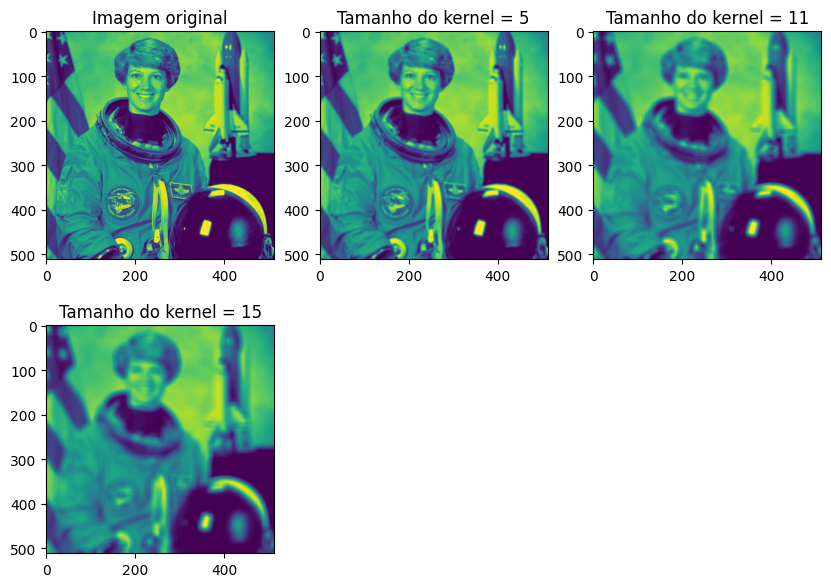

In [31]:
img6 = cv2.imread('astronaut.png', cv2.IMREAD_GRAYSCALE)
img6_kernel1 = caixa_filtro(5, img6)
img6_kernel2 = caixa_filtro(11, img6)
img6_kernel3 = caixa_filtro(15, img6)

plt.figure(figsize=(10, 7))
plt.subplot(231);
plt.title('Imagem original');
plt.imshow(img6);
plt.subplot(232);
plt.title('Tamanho do kernel = 5');
plt.imshow(img6_kernel1);
plt.subplot(233);
plt.title('Tamanho do kernel = 11');
plt.imshow(img6_kernel2);
plt.subplot(234);
plt.title('Tamanho do kernel = 15');
plt.imshow(img6_kernel3);

### Filtro espacial Gaussiano

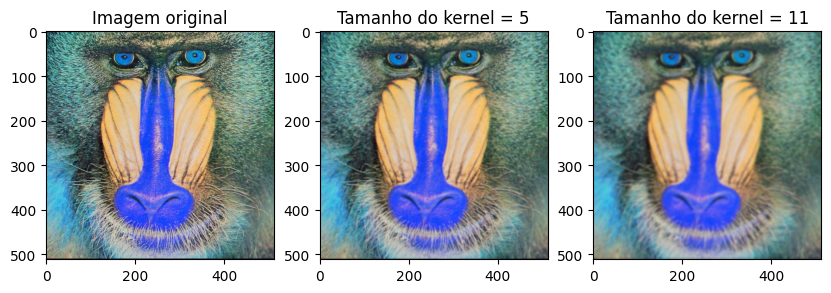

In [34]:
img8 = cv2.imread('baboon.png', cv2.IMREAD_COLOR)
img8_gauss = cv2.GaussianBlur(img8, (5, 5), 0)
img8_gauss2 = cv2.GaussianBlur(img8, (11, 11), 0)

plt.figure(figsize=(10, 7))
plt.subplot(231);
plt.title('Imagem original');
plt.imshow(img8);
plt.subplot(232);
plt.title('Tamanho do kernel = 5');
plt.imshow(img8_gauss);
plt.subplot(233);
plt.title('Tamanho do kernel = 11');
plt.imshow(img8_gauss2);

# Realce de imagens no domínio da frequência e filtros

### Filtro de média

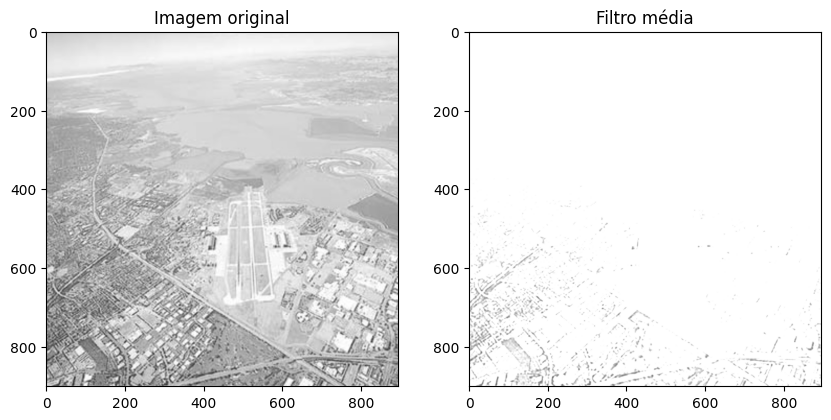

In [39]:
img9 = cv2.imread('city.jpg')

kernel_media = np.array([[1/5, 1/5, 1/5],
                        [1/5, 1/5, 1/5],
                        [1/5, 1/5, 1/5]])

img9_media = cv2.filter2D(img9, cv2.CV_16S, kernel_media)

plt.figure(figsize=(10, 7))
plt.subplot(121);
plt.title('Imagem original');
plt.imshow(img9);
plt.subplot(122);
plt.title('Filtro média');
plt.imshow(img9_media);

### Filtro de Sobel: Próxima aula (26/09/2025)